In [9]:
import matplotlib.pyplot as plt
import xarray as xr
import scipy.signal
from notebook_metadata import create_savefig

%matplotlib inline

savefig = create_savefig(dir='/g/data/p66/mrd599/temp', nb='nep_check.ipynb')


In [2]:
areacella = xr.load_dataset('/g/data/fs38/publications/CMIP6/CMIP/CSIRO/ACCESS-ESM1-5/piControl/r1i1p1f1/fx/areacella/gn/latest/areacella_fx_ACCESS-ESM1-5_piControl_r1i1p1f1_gn.nc').areacella
sftlf = xr.load_dataset('/g/data/fs38/publications/CMIP6/CMIP/CSIRO/ACCESS-ESM1-5/piControl/r1i1p1f1/fx/sftlf/gn/latest/sftlf_fx_ACCESS-ESM1-5_piControl_r1i1p1f1_gn.nc').sftlf

In [12]:
# Annual means all calculated with cdo yearmonmean
# From archived model output
flux = xr.load_dataset('/scratch/p66/mrd599/esm/HI-05_co2flux.nc').fld_s03i100
# Flip sign and convert from mass of CO2 to mass of C
# Change dimension names to standard lat, lon
flux = -12/44 * flux.rename({'lat_v':'lat', 'lon_u':'lon'})
# From published CMIP6 data
nep = xr.load_dataset('/scratch/p66/mrd599/esm/nep_hist_ann.nc').nep
nbp = xr.load_dataset('/scratch/p66/mrd599/esm/nbp_hist_ann.nc').nbp

sf = 86400 * 365 * 1e-12  # kg/s to Pg/year
nep_g = (nep*areacella).sum(('lat', 'lon')) * sf
nbp_g = (nbp*areacella).sum(('lat', 'lon')) * sf
flux_g = (flux*areacella).sum(('lat', 'lon')) * sf

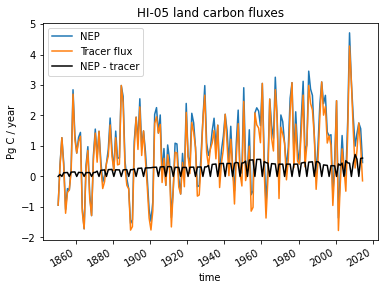

In [13]:
fig, axes = plt.subplots()
nep_g.plot(label='NEP')
# nbp_g.plot(label='NBP')
flux_g.plot(label='Tracer flux')
(nep_g-flux_g).plot(label='NEP - tracer', color='black')
axes.legend()
axes.set_title('HI-05 land carbon fluxes')
axes.set_ylabel('Pg C / year');

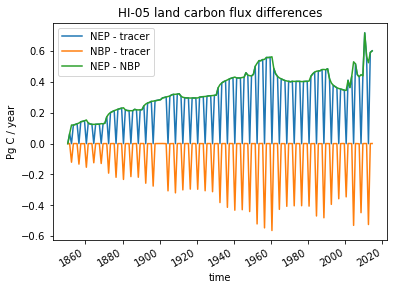

In [14]:
fig, axes = plt.subplots()
(nep_g-flux_g).plot(label='NEP - tracer')
(nbp_g-flux_g).plot(label='NBP - tracer')
(nep_g-nbp_g).plot(label='NEP - NBP')
axes.set_title('HI-05 land carbon flux differences')
axes.set_ylabel('Pg C / year')
axes.legend();

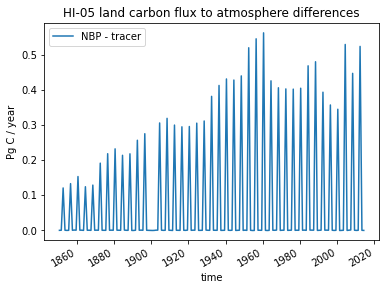

In [15]:
# Flux to atmosphere difference
fig, axes = plt.subplots()
(-1*(nbp_g-flux_g)).plot(label='NBP - tracer')
axes.set_title('HI-05 land carbon flux to atmosphere differences')
axes.set_ylabel('Pg C / year')
axes.legend();

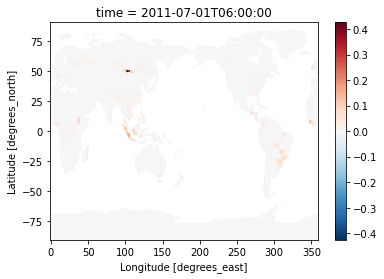

In [56]:
# 2011 difference kg/m^2/s
((nep[161] - flux[161])*(96400*365)).plot();

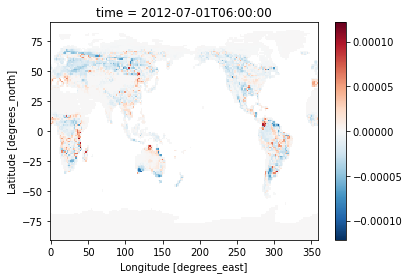

In [57]:
# 2012 difference kg/m^2/s
((nep[162] - flux[162])*(96400*365)).plot();

In [58]:
treefrac = xr.load_dataset('/g/data/fs38/publications/CMIP6/CMIP/CSIRO/ACCESS-ESM1-5/historical/r1i1p1f1/Lmon/treeFrac/gn/latest/treeFrac_Lmon_ACCESS-ESM1-5_historical_r1i1p1f1_gn_185001-201412.nc').treeFrac
# Constant within each year, so just take Jan value
treefrac = treefrac[::12]
# Note that this is relative to the global area, not the land area
treefrac_g = (treefrac*areacella).sum(('lat', 'lon')) / areacella.sum(('lat', 'lon'))

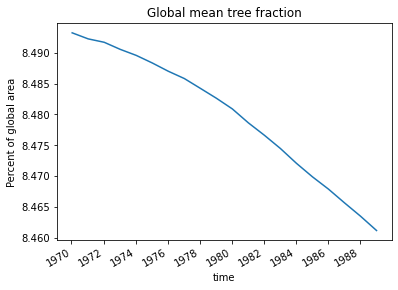

In [65]:
fig, axes = plt.subplots()
treefrac_g[120:140].plot()
axes.set_title('Global mean tree fraction')
axes.set_ylabel('Percent of global area');

In [60]:
# Monthly means
flux = xr.load_dataset('/scratch/p66/mrd599/esm/HI-05_all.nc').fld_s03i100
# Flip sign and convert from mass of CO2 to mass of C
# Change dimension names to standard lat, lon
flux = -12/44 * flux.rename({'lat_v':'lat', 'lon_u':'lon'})
nep = xr.load_dataset('/g/data/fs38/publications/CMIP6/CMIP/CSIRO/ACCESS-ESM1-5/historical/r1i1p1f1/Emon/nep/gn/latest/nep_Emon_ACCESS-ESM1-5_historical_r1i1p1f1_gn_185001-201412.nc').nep
nbp = xr.load_dataset('/g/data/fs38/publications/CMIP6/CMIP/CSIRO/ACCESS-ESM1-5/historical/r1i1p1f1/Lmon/nbp/gn/latest/nbp_Lmon_ACCESS-ESM1-5_historical_r1i1p1f1_gn_185001-201412.nc').nbp

In [61]:
nep_g = (nep*areacella).sum(('lat', 'lon'))
nbp_g = (nbp*areacella).sum(('lat', 'lon'))
flux_g = (flux*areacella).sum(('lat', 'lon'))

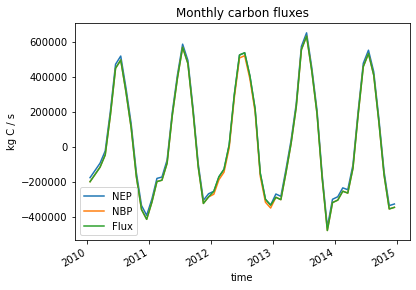

In [62]:
fig, axes = plt.subplots()
nep_g[-60:].plot(label='NEP')
nbp_g[-60:].plot(label='NBP')
flux_g[-60:].plot(label='Flux')
axes.set_ylabel('kg C / s')
axes.legend()
axes.set_title('Monthly carbon fluxes');

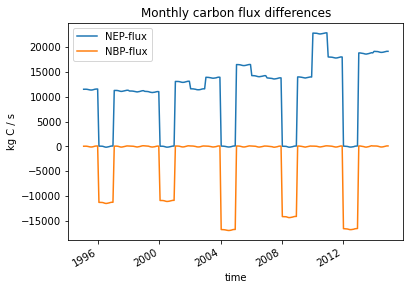

In [63]:
fig, axes = plt.subplots()
(nep_g[-240:]-flux_g[-240:]).plot(label='NEP-flux')
(nbp_g[-240:]-flux_g[-240:]).plot(label='NBP-flux')
axes.set_ylabel('kg C / s')
axes.legend()
axes.set_title('Monthly carbon flux differences');

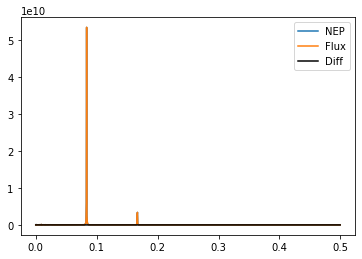

In [64]:
# Start from 1901 to skip distorting effect of 1900
f, p = scipy.signal.periodogram(nep_g[51:].values,scaling='spectrum')
f2, p2 = scipy.signal.periodogram(flux_g[51:].values,scaling='spectrum')
f3, p3 = scipy.signal.periodogram((nep_g-flux_g).values[51:],scaling='spectrum')
fig, axes = plt.subplots()
plt.plot(f,p, label='NEP')
plt.plot(f2,p2, label='Flux')
plt.plot(f3,p3, label='Diff', color='black')
axes.legend();
# axes.set_xlim(0.2,0.3)

In [4]:
# Annual means all calculated with cdo yearmonmean
# From archived model output
flux = xr.load_dataset('/scratch/p66/mrd599/esm/HI-EDC-03_co2flux.nc').fld_s03i100
# Flip sign and convert from mass of CO2 to mass of C
# Change dimension names to standard lat, lon
flux = -12/44 * flux.rename({'lat_v':'lat', 'lon_u':'lon'})
# From published CMIP6 data
nep = xr.load_dataset('/scratch/p66/mrd599/esm/nep_esm-hist_ann.nc').nep
nbp = xr.load_dataset('/scratch/p66/mrd599/esm/nbp_esm-hist_ann.nc').nbp

sf = 86400 * 365 * 1e-12  # kg/s to Pg/year
nep_g = (nep*areacella).sum(('lat', 'lon')) * sf
nbp_g = (nbp*areacella).sum(('lat', 'lon')) * sf
flux_g = (flux*areacella).sum(('lat', 'lon')) * sf

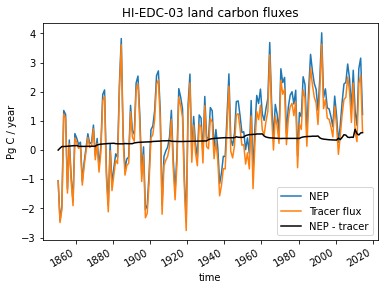

In [5]:
fig, axes = plt.subplots()
nep_g.plot(label='NEP')
# nbp_g.plot(label='NBP')
flux_g.plot(label='Tracer flux')
(nep_g-flux_g).plot(label='NEP - tracer', color='black')
axes.legend()
axes.set_title('HI-EDC-03 land carbon fluxes')
axes.set_ylabel('Pg C / year');

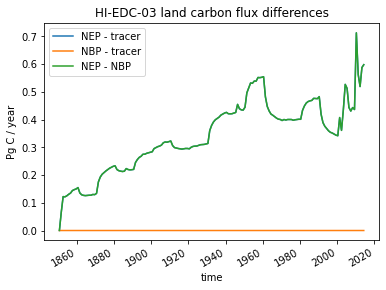

In [10]:
fig, axes = plt.subplots()
(nep_g-flux_g).plot(label='NEP - tracer')
(nbp_g-flux_g).plot(label='NBP - tracer')
(nep_g-nbp_g).plot(label='NEP - NBP')
axes.set_title('HI-EDC-03 land carbon flux differences')
axes.set_ylabel('Pg C / year')
axes.legend();
savefig('cflux_diff_HI-EDC-03.png')